# Analysis of MSE and CRLB for Line Fitting

This notebook aims to compare the performance of an estimator for a linear model by evaluating its Mean Squared Error (MSE) against the Cramér-Rao Lower Bound (CRLB) for the intercept (A) and slope (B) parameters. The CRLB provides a theoretical lower bound for the variance of any unbiased estimator, and comparing the MSE to the CRLB helps determine how efficient the estimator is.

### 1. Computing Cramér-Rao Lower Bound (CRLB) for A and B

>Refer to the documentation provided in `assets` directory

_Importing Libraries_

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from src.fischer import fisher_information_matrix
from src.mse import compute_mse
import warnings
warnings.filterwarnings("ignore")

_Parameters_

In [56]:
N = 2000  # Number of observations
var = 10  # Variance of noise
A_true = 2.0  # True intercept
B_true = 1.5  # True slope

_Generating noisy data_

In [57]:
n = np.arange(N)
w = np.random.normal(0, np.sqrt(var), N)  # Gaussian noise

len(w)

2000

_Plotting the noise_

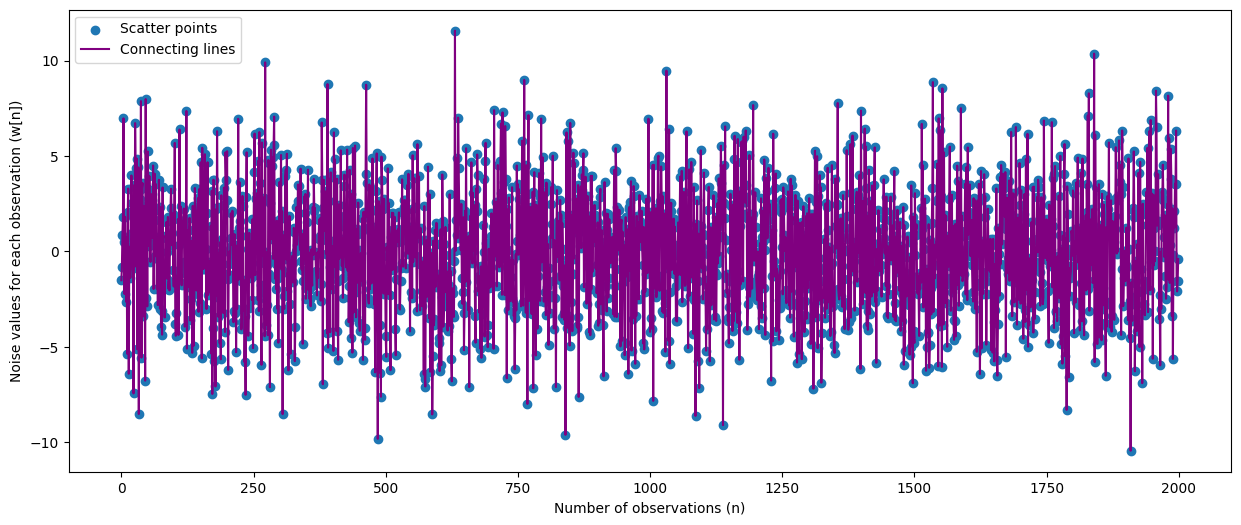

In [58]:
plt.figure(figsize=(15, 6))
plt.scatter(n, w, label='Scatter points')
plt.plot(n, w, label='Connecting lines', color='purple')
plt.xlabel("Number of observations (n)")
plt.ylabel("Noise values for each observation (w[n])")
plt.legend()
plt.show()

_Generating the line fitting expression (true and noise-added)_

In [59]:
x_true = A_true + B_true * n
x = x_true + w  
len(x),len(x_true)

(2000, 2000)

_Plotting the line fitting expression (true and noise-added)_

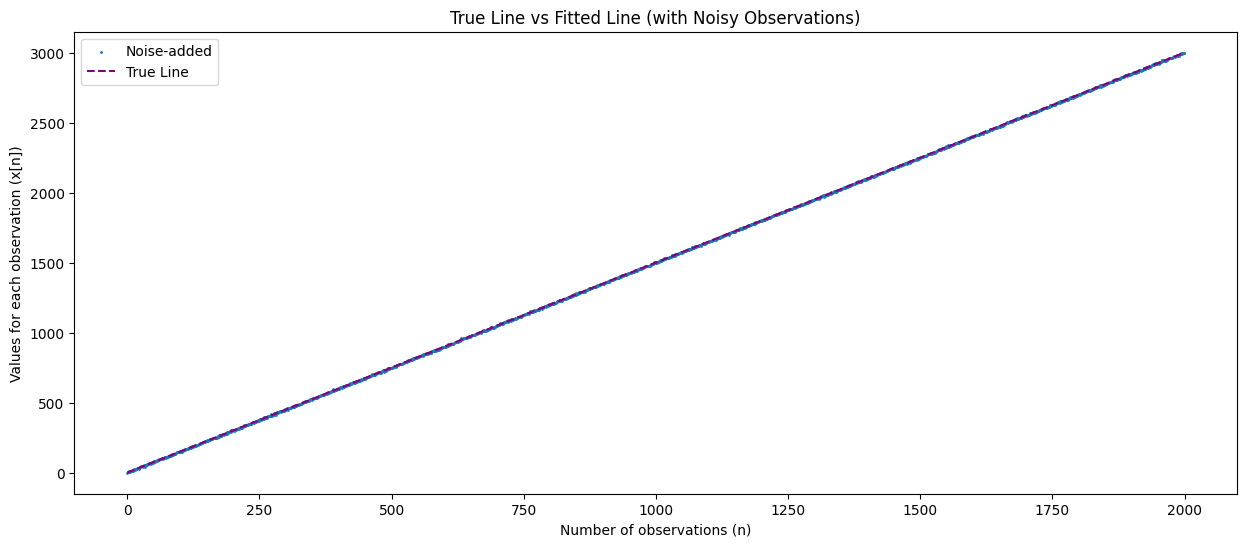

In [60]:
plt.figure(figsize=(15, 6))
plt.title('True Line vs Fitted Line (with Noisy Observations)')
plt.scatter(n, x, label='Noise-added', s = 1)
plt.plot(n, x_true, label='True Line', color='purple', linestyle='dashed')
plt.xlabel("Number of observations (n)")
plt.ylabel("Values for each observation (x[n])")
plt.legend()
plt.show()

_Computing Fisher Information Matrix_

In [61]:
FIM = fisher_information_matrix(N, var) # I(theta)

_Compute Inverse of Fisher Information Matrix (for computing CRLB)_

In [62]:
CRLB = np.linalg.inv(FIM)  # Inverse of I(theta)

_Extract CRLB for A and B_

In [63]:
CRLB_A = CRLB[0, 0]
CRLB_B = CRLB[1, 1]

In [64]:
print(f"CRLB for A (variance of A): {CRLB_A}")
print(f"CRLB for B (variance of B): {CRLB_B}")

CRLB for A (variance of A): 0.019985007496251875
CRLB for B (variance of B): 1.5000003750000935e-08


### 2. Maximum Likelihood Esmitation and Mean Squared Error while performing estimation of A and B

>Refer to the documentation provided in `assets` directory

_Parameters_

In [65]:
num_simulations = 1000  # Number of experiments -> 1e3 times
max_samples = 2000  # Maximum number of samples
var = 10  # Variance of noise
A_true = 2.0  # True intercept
B_true = 1.5  # True slope

_Arrays to store the average MSE values across experiments for each sample size_

In [66]:
mse_A_values = np.zeros(max_samples)
mse_B_values = np.zeros(max_samples)

_Run simulations for increasing sample sizes_

In [67]:
for sample_size in range(1, max_samples + 1):
    A_estimates = np.zeros(num_simulations)
    B_estimates = np.zeros(num_simulations)
    
    # Conduct num_simulations experiments for each sample size
    for i in range(num_simulations):
        # Generate noisy data for the current sample size
        n = np.arange(sample_size)
        w = np.random.normal(0, np.sqrt(var), sample_size)  # Gaussian noise
        
        # Generating the line fitting expression (true and noise-added)
        x_true = A_true + B_true * n
        x = x_true + w  

        # Step 1: Calculate means of x and n
        x_mean = np.mean(x)
        n_mean = np.mean(n)

        # Step 2: Compute MLE for B (slope)
        numerator_B = np.sum((x - x_mean) * (n - n_mean))
        denominator_B = np.sum((n - n_mean) ** 2)
        B_mle = numerator_B / denominator_B

        # Step 3: Compute MLE for A (intercept)
        A_mle = x_mean - B_mle * n_mean

        # Store the MLE estimates for this experiment
        A_estimates[i] = A_mle
        B_estimates[i] = B_mle

    # Compute the average MSE across all experiments for the current sample size
    mse_A, mse_B = compute_mse(A_estimates, B_estimates, A_true, B_true)
    
    # Store the MSE values for plotting later
    mse_A_values[sample_size - 1] = mse_A
    mse_B_values[sample_size - 1] = mse_B

_Plotting MSE and CRLB for intercept (A)_

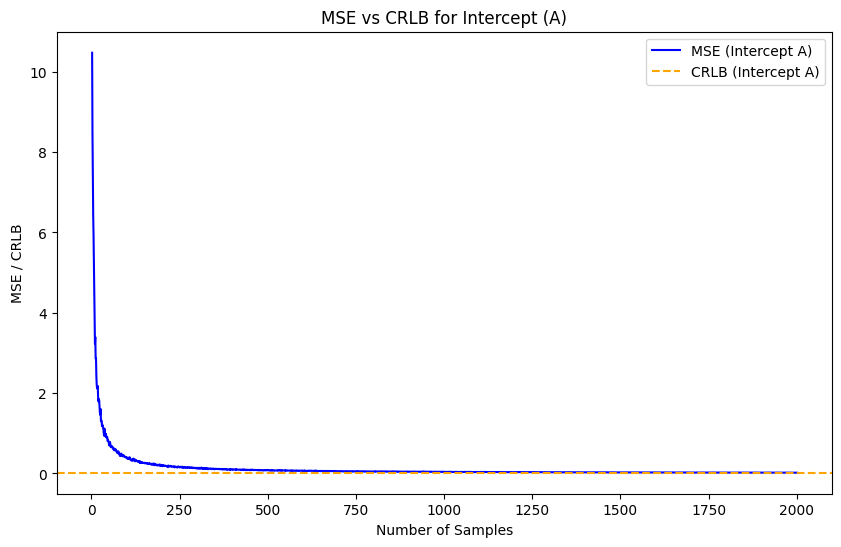

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, max_samples + 1), mse_A_values, label='MSE (Intercept A)', color='blue')
plt.axhline(y=CRLB_A, color='orange', linestyle='--', label='CRLB (Intercept A)')
plt.xlabel('Number of Samples')
plt.ylabel('MSE / CRLB')
plt.title('MSE vs CRLB for Intercept (A)')
plt.legend()
plt.show()

_Plotting MSE and CRLB for slope (B)_

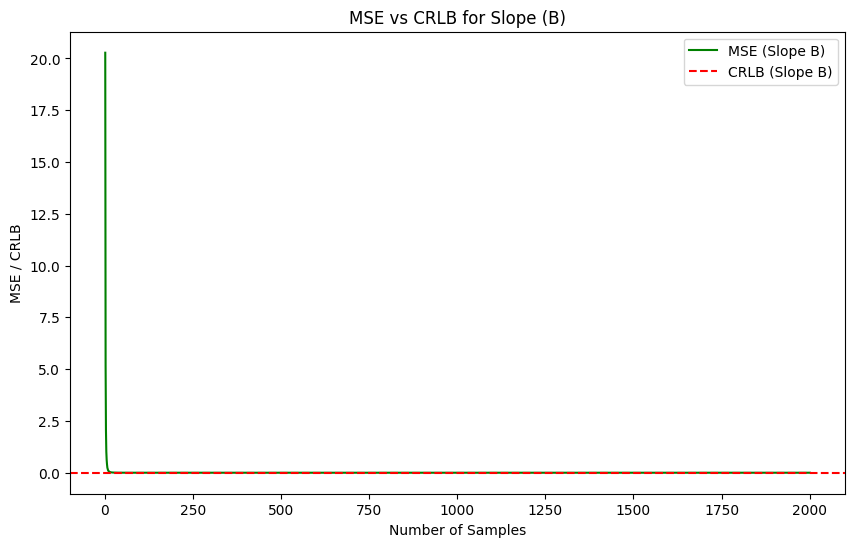

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, max_samples + 1), mse_B_values, label='MSE (Slope B)', color='green')
plt.axhline(y=CRLB_B, color='red', linestyle='--', label='CRLB (Slope B)')
plt.xlabel('Number of Samples')
plt.ylabel('MSE / CRLB')
plt.title('MSE vs CRLB for Slope (B)')
plt.legend()
plt.show()

### Observations Based on the Given CRLB Values for A and B

#### Intercept A (First Graph):
- The **CRLB for Intercept A** is approximately **0.019985**.
- The MSE for Intercept A starts higher but gradually decreases as the number of experiments increases, stabilizing around the CRLB value. 
- This shows that the estimator for A becomes more efficient and approaches the theoretical lower bound with more data.

#### Slope B (Second Graph):
- The **CRLB for Slope B** is around **1.5 × 10^−8**.
- Similar to A, the MSE for Slope B starts high and decreases over time, stabilizing around the CRLB as more experiments are performed.
- The pattern indicates that, with enough data, the MSE also approaches the CRLB for the slope, demonstrating efficient estimation.

#### Conclusion:
Both graphs show that as the number of experiments increases, the MSE for both A and B approaches their respective CRLB values. This suggests that the estimators are **consistent** and **efficient** when a sufficient number of experiments is performed.
